In [ ]:
pip install pandas scikit-learn matplotlib seaborn xgboost


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Fill missing values using interpolation
data = data.interpolate()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the Amount column using Min-Max Scaling
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Impute missing values in the dataset with mean values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both train and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_gbm))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4755
         1.0       0.93      0.76      0.84        17

    accuracy                           1.00      4772
   macro avg       0.96      0.88      0.92      4772
weighted avg       1.00      1.00      1.00      4772



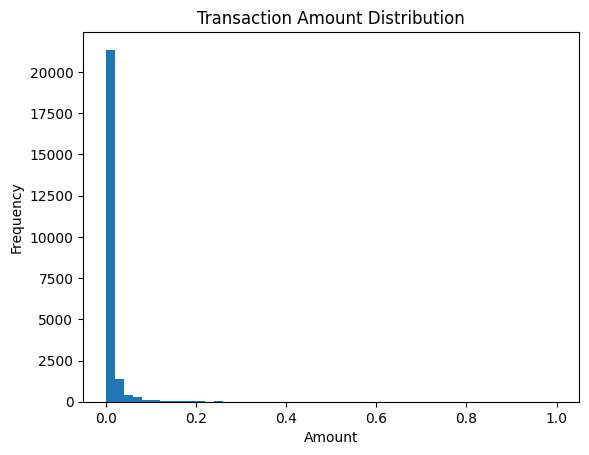

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of Amount
plt.hist(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


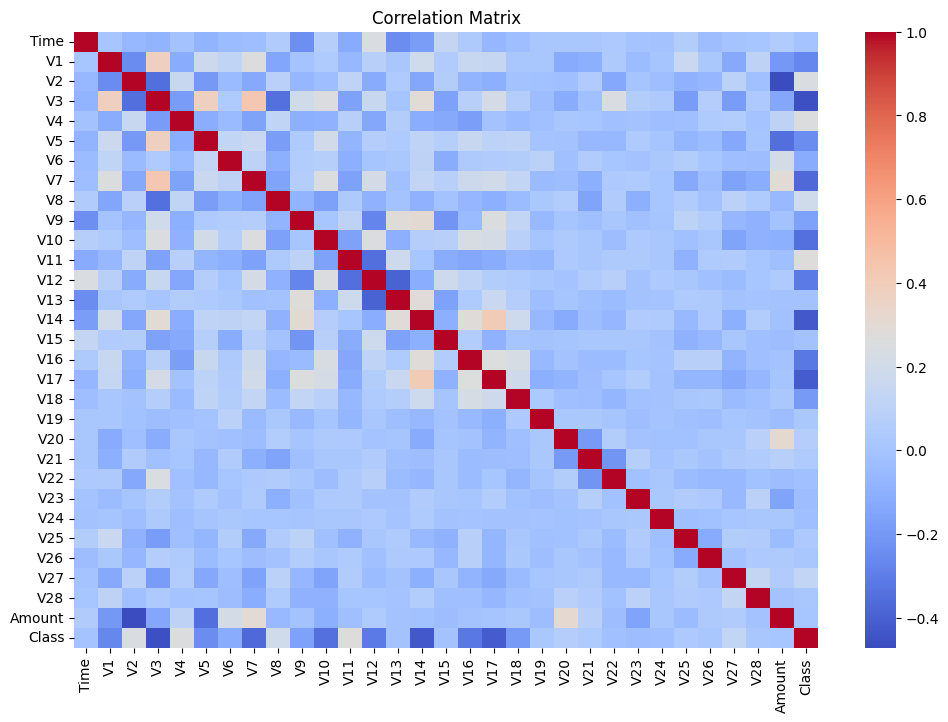

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Assuming each 'Time' unit represents seconds, you can calculate the number of transactions per hour
data['Transaction_Frequency'] = data.groupby('Time')['Amount'].transform('count')


In [ ]:
# Calculate average transaction amount per user
data['Avg_Transaction_Amount'] = data.groupby('Time')['Amount'].transform('mean')


In [ ]:
# Variance in transaction amounts
data['Amount_Variance'] = data.groupby('Time')['Amount'].transform('var')

# Time differences between consecutive transactions
data['Time_Diff'] = data['Time'].diff().fillna(0)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4755
         1.0       1.00      0.88      0.94        17

    accuracy                           1.00      4772
   macro avg       1.00      0.94      0.97      4772
weighted avg       1.00      1.00      1.00      4772



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_gbm))


ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 50}


In [ ]:
def analyze_transaction(transaction):
    prediction = rf.predict(transaction)
    if prediction == 1:
        print("Alert: Potential fraud detected!")


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Gradient Boosting Accuracy: {accuracy_gbm}")


Random Forest Accuracy: 0.9995808885163453
Gradient Boosting Accuracy: 0.9989522212908634
